In [512]:
import numpy, scipy, pandas
import matplotlib, seaborn
import matplotlib.pyplot as plt
import scipy.signal
from imp import reload

import peap
from peap import one_dim

from peap import utilities


In [7]:
reload(peap.utilities)

<module 'peap.utilities' from '/gpfs/data01/glasslab/home/dskola/workspace/ABC/peap/utilities.py'>

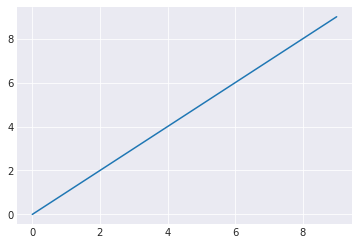

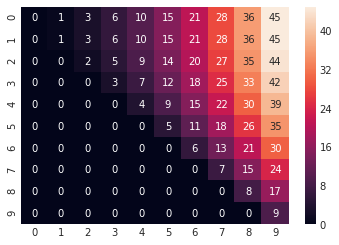

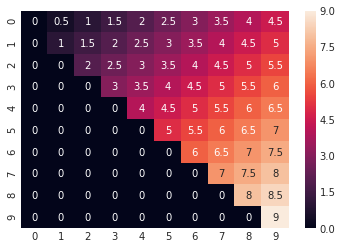

In [37]:
reload(peap.one_dim)
from peap.one_dim import *

test_vec = numpy.arange(10)

plt.plot(test_vec)
plt.show()

sums = compute_subarray_sums(test_vec)
seaborn.heatmap(sums, annot=True)
plt.show()
means = compute_subarray_means(test_vec)

seaborn.heatmap(means, annot=True)

In [54]:
b = scipy.stats.beta
b.fit()

## Distro

In [103]:
class empirical_gen(scipy.stats.rv_continuous):
#     def __init__(self, frequencies, support=DEFAULT_SUPPORT, pseudocount=0):
#         assert support[1] >= support[0]

#         self.support = support

#         self.num_bins = len(frequencies)
#         self.bin_size = self.support_size / self.num_bins
#         self.bin_starts = numpy.linspace(self.support[0], self.support[1] - self.bin_size, num=self.num_bins)
#         self.bin_midpoints = self.bin_starts + self.bin_size / 2
#         self.bin_ends = numpy.linspace(self.support[0] + self.bin_size, self.support[1], num=self.num_bins)

#         self.frequencies = numpy.array(frequencies)
    
    def _fit(self, num_bins=DEFAULT_BINS, support=None, pseudocount=0):
#         data = clean_array(data)
        assert len(data) > 0, 'Data must have non-zero length'
        assert sum(numpy.isnan(data)) == 0, 'Data must not contain NaN'
        assert sum(numpy.isinf(data)) == 0, 'Data must not contain inf'
        assert sum(numpy.isneginf(data)) == 0, 'Data must not contain neginf'

        if support is None: # set the support to the min and max of the fit data
            support = (data.min(), data.max())
        self.a, self.b = support

        counts, bins = numpy.histogram(data, bins=numpy.linspace(self.a, self.b, num=num_bins + 1))
        counts += pseudocount
        self.frequencies = counts / counts.sum()
        self._cdf_values = numpy.cumsum(self.frequencies)
        self._sf_values = numpy.cumsum(self.frequencies[::-1])[::-1]  # Needed to avoid round-off errors near 1. Maybe we can do all this better natively in logspace.


#     @property
#     def densities(self):
#         return self.frequencies / self.bin_size

#     @property
#     def support_size(self):
#         return self.support[1] - self.support[0]

#     def copy(self):
#         return type(self)(frequencies=self.densities, support=self.support)

#     def mean(self):
#         """
#         Returns the expectation of the random variable described by this distribution
#         """
#         return numpy.sum(self.frequencies * self.bin_midpoints)

#     def std(self):
#         """
#         Returns the standard deviation of the random variable described by this distribution
#         """
#         m = self.mean()
#         return numpy.sqrt((((self.bin_midpoints - m) ** 2) * self.frequencies).sum())

#     def estimate_mean_sample_distro(self, region_size, resample=False):
#         """
#         From the empirical distribution of a population, return the estimated
#         distribution of the mean of a sample of that population of size
#         :param:`region_size` over the same support.
#         """
#         new_frequencies = self.frequencies.copy()
#         for i in range(1, region_size):
#             new_frequencies = scipy.signal.convolve(new_frequencies, self.frequencies, mode='full', method='direct')
#         if resample:
#             new_frequencies = resample_array(arr=new_frequencies, new_size=self.num_bins, support=self.support)

#         return type(self)(frequencies=new_frequencies, support=self.support)

    def pdf(self, x, smoothing_bandwidth=DEFAULT_PDF_SMOOTHING_BANDWIDTH):
        """
        Returns the PDF evaluated at the points in :param:`x`

        Note: If the data only sparsely populates the frequency histogram
        (because the number of bins is large), then the PDF will be sparse
        as well, which could lead to problems. Use with caution.

        As an experimental workaround, try setting values of :param:`smoothing_bandwidth`
        to a value lower than the number of bins. This will redensify the frequency histogram
        and the corresponding PDF values by smoothing the frequencies with a gaussian
        kernel (equivalent to KDE). Values in the range 5-100 might work well.
        """
        if not smoothing_bandwidth:
            return self._pdf(x) 
        else:
            return scipy.convolve(self._pdf(x), gaussian_kernel(smoothing_bandwidth), mode='same')

    def _pdf(self, x):
        """
        Returns the PDF evaluated at the points in :param:`x`

        Note: If the data only sparsely populates the frequency histogram
        (because the number of bins is large), then the PDF will be sparse
        as well, which could lead to problems. Use with caution.

        As an experimental workaround, try setting values of :param:`smoothing_bandwidth`
        to a value lower than the number of bins. This will redensify the frequency histogram
        and the corresponding PDF values by smoothing the frequencies with a gaussian
        kernel (equivalent to KDE). Values in the range 5-100 might work well.
        """
        return self.frequencies[numpy.maximum(0, numpy.searchsorted(self.bin_starts, x) + BIN_OFFSET)] / self.bin_size 
    
    def _cdf(self, x):
        """
        Returns the CDF evaluated at the points in :param:`x`
        """
        return self._cdf_values[numpy.maximum(0, numpy.searchsorted(self.bin_starts, x) + BIN_OFFSET)]

    def _sf(self, x):
        return self.sf_values[numpy.maximum(0, numpy.searchsorted(self.bin_starts, x) + BIN_OFFSET)]

    def _logsf(self, x):
        return numpy.log(numpy.maximum(self._sf(x), MIN_PVALUE))
        # ToDo: Build in standard approximation (should never return 0 p-values)

#     def as_frequency_series(self):
#         """
#         Return a pandas.Series representing the data frequencies with the left edge of each
#         bin as the index.
#         """
#         return pandas.Series(self.frequencies, index=self.bin_starts)
    
empirical = empirical_gen(name='empirical')    

## Try passing the data as a shape parameter

In [148]:
DEFAULT_BINS

1001

In [198]:
class empirical_gen(scipy.stats.rv_continuous):
#     def __init__(self, frequencies, support=DEFAULT_SUPPORT, pseudocount=0):
#         assert support[1] >= support[0]

#         self.support = support

#         self.num_bins = len(frequencies)
#         self.bin_size = self.support_size / self.num_bins
#         self.bin_starts = numpy.linspace(self.support[0], self.support[1] - self.bin_size, num=self.num_bins)
#         self.bin_midpoints = self.bin_starts + self.bin_size / 2
#         self.bin_ends = numpy.linspace(self.support[0] + self.bin_size, self.support[1], num=self.num_bins)

#         self.frequencies = numpy.array(frequencies)
    
#     def _fit(self, num_bins=DEFAULT_BINS, support=None, pseudocount=0):
# #         data = clean_array(data)
#         assert len(data) > 0, 'Data must have non-zero length'
#         assert sum(numpy.isnan(data)) == 0, 'Data must not contain NaN'
#         assert sum(numpy.isinf(data)) == 0, 'Data must not contain inf'
#         assert sum(numpy.isneginf(data)) == 0, 'Data must not contain neginf'

#         if support is None: # set the support to the min and max of the fit data
#             support = (data.min(), data.max())
#         self.a, self.b = support

#         counts, bins = numpy.histogram(data, bins=numpy.linspace(self.a, self.b, num=num_bins + 1))
#         counts += pseudocount
#         frequencies = counts / counts.sum()
#         cdf_values = numpy.cumsum(frequencies)
# #         self._sf_values = numpy.cumsum(self.frequencies[::-1])[::-1]  # Needed to avoid round-off errors near 1. Maybe we can do all this better natively in logspace.
        
#         return frequencies, cdf_values
    
    @staticmethod
    def _frequencies_from_data(data, num_bins=1001, pseudocount=0):
#         data = clean_array(data)
        assert len(data) > 0, 'Data must have non-zero length'
        assert sum(numpy.isnan(data)) == 0, 'Data must not contain NaN'
        assert sum(numpy.isinf(data)) == 0, 'Data must not contain inf'
        assert sum(numpy.isneginf(data)) == 0, 'Data must not contain neginf'

        a, b = min(data), max(data)
        bin_size = (b - a) / num_bins

        counts, bins = numpy.histogram(data, bins=numpy.linspace(a, b, num=num_bins + 1))
        counts += pseudocount
        frequencies = counts / counts.sum()
#         cdf_values = numpy.cumsum(frequencies)
#         self._sf_values = numpy.cumsum(self.frequencies[::-1])[::-1]  # Needed to avoid round-off errors near 1. Maybe we can do all this better natively in logspace.
        
        return bin_size, bins, frequencies    

#     @property
#     def densities(self):
#         return self.frequencies / self.bin_size

#     @property
#     def support_size(self):
#         return self.support[1] - self.support[0]

#     def copy(self):
#         return type(self)(frequencies=self.densities, support=self.support)

#     def mean(self):
#         """
#         Returns the expectation of the random variable described by this distribution
#         """
#         return numpy.sum(self.frequencies * self.bin_midpoints)

#     def std(self):
#         """
#         Returns the standard deviation of the random variable described by this distribution
#         """
#         m = self.mean()
#         return numpy.sqrt((((self.bin_midpoints - m) ** 2) * self.frequencies).sum())

#     def estimate_mean_sample_distro(self, region_size, resample=False):
#         """
#         From the empirical distribution of a population, return the estimated
#         distribution of the mean of a sample of that population of size
#         :param:`region_size` over the same support.
#         """
#         new_frequencies = self.frequencies.copy()
#         for i in range(1, region_size):
#             new_frequencies = scipy.signal.convolve(new_frequencies, self.frequencies, mode='full', method='direct')
#         if resample:
#             new_frequencies = resample_array(arr=new_frequencies, new_size=self.num_bins, support=self.support)

#         return type(self)(frequencies=new_frequencies, support=self.support)

#     def pdf(self, x, data, smoothing_bandwidth=DEFAULT_PDF_SMOOTHING_BANDWIDTH):
#         """
#         Returns the PDF evaluated at the points in :param:`x`

#         Note: If the data only sparsely populates the frequency histogram
#         (because the number of bins is large), then the PDF will be sparse
#         as well, which could lead to problems. Use with caution.

#         As an experimental workaround, try setting values of :param:`smoothing_bandwidth`
#         to a value lower than the number of bins. This will redensify the frequency histogram
#         and the corresponding PDF values by smoothing the frequencies with a gaussian
#         kernel (equivalent to KDE). Values in the range 5-100 might work well.
#         """
#         if not smoothing_bandwidth:
#             return self._pdf(x, data=data) 
#         else:
#             return scipy.convolve(self._pdf(x, data=data), gaussian_kernel(smoothing_bandwidth), mode='same')

    def _pdf(self, x, data):
        """
        Returns the PDF evaluated at the points in :param:`x`

        Note: If the data only sparsely populates the frequency histogram
        (because the number of bins is large), then the PDF will be sparse
        as well, which could lead to problems. Use with caution.

        As an experimental workaround, try setting values of :param:`smoothing_bandwidth`
        to a value lower than the number of bins. This will redensify the frequency histogram
        and the corresponding PDF values by smoothing the frequencies with a gaussian
        kernel (equivalent to KDE). Values in the range 5-100 might work well.
        """

        bin_size, bin_starts, frequencies = self._frequencies_from_data(data)
        print('_pdf')
        print('x={}, data={}'.format(x,data)) #data, bin_starts, frequencies, bin_size)
        print(numpy.searchsorted(bin_starts, x))
        return frequencies[numpy.maximum(0, numpy.searchsorted(bin_starts, x) + BIN_OFFSET)] / bin_size 
    
#     def _cdf(self, x):
#         """
#         Returns the CDF evaluated at the points in :param:`x`
#         """
#         return self._cdf_values[numpy.maximum(0, numpy.searchsorted(self.bin_starts, x) + BIN_OFFSET)]

#     def _sf(self, x):
#         return self.sf_values[numpy.maximum(0, numpy.searchsorted(self.bin_starts, x) + BIN_OFFSET)]

#     def _logsf(self, x):
#         return numpy.log(numpy.maximum(self._sf(x), MIN_PVALUE))
#         # ToDo: Build in standard approximation (should never return 0 p-values)

#     def as_frequency_series(self):
#         """
#         Return a pandas.Series representing the data frequencies with the left edge of each
#         bin as the index.
#         """
#         return pandas.Series(self.frequencies, index=self.bin_starts)
    
empirical = empirical_gen(name='empirical')    

## Unit tests

In [199]:
print(DEFAULT_BINS)

1001


In [200]:
numpy.random.seed(1)
data = scipy.stats.norm.rvs(size=100)

test_distro_1 = empirical(data=data)

# empirical._frequencies_from_data(data)
x = test_distro_1.pdf(0.5)

_pdf
x=[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5], data=[1.62434536 0.86540763 1.74481176 0.3190391  1.46210794 1.13376944
 0.04221375 0.58281521 1.14472371 0.90159072 0.50249434 0.90085595
 0.53035547 0.2344157  1.65980218 0.74204416 1.6924546  0.05080775
 0.19091548 2.10025514 0.12015895 0.61720311 0.30017032 0.58662319
 0.83898341 0.93110208 0.28558733 0.88514116 1.25286816 0.51292982
 0.48851815 1.13162939 1.51981682 2.18557541 0.16003707 0.87616892
 0.31563495 0.82797464 0.23009474 0.76201118 0.18656139 0.41005165
 0.19829972 0.11900865 0.37756379 0.12182127 1.12948391 1.19891788
 0.18515642 0.42349435 0.07734007 0.04359686 0.69803203]
[214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214
 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214
 214 214 214 214 214 214 214 214

In [193]:
x

array([ 0., nan, nan, nan,  0., nan,  0., nan,  0., nan,  0., nan, nan,
       nan,  0., nan, nan, nan,  0.,  0., nan,  0.,  0.,  0.,  0., nan,
       nan, nan, nan,  0., nan, nan, nan, nan, nan, nan, nan,  0.,  0.,
        0., nan, nan, nan,  0.,  0., nan,  0.,  0.,  0.,  0.,  0., nan,
       nan, nan, nan,  0.,  0.,  0.,  0.,  0., nan,  0.,  0., nan,  0.,
       nan,  0.,  0.,  0., nan, nan, nan,  0.,  0.,  0., nan, nan,  0.,
        0.,  0., nan, nan,  0.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,
        0., nan, nan,  0.,  0., nan,  0., nan,  0.])

In [ ]:
test_distro_1.pdf()

In [131]:
dir(test_distro_1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'a',
 'args',
 'b',
 'cdf',
 'dist',
 'entropy',
 'expect',
 'interval',
 'isf',
 'kwds',
 'logcdf',
 'logpdf',
 'logpmf',
 'logsf',
 'mean',
 'median',
 'moment',
 'pdf',
 'pmf',
 'ppf',
 'random_state',
 'rvs',
 'sf',
 'stats',
 'std',
 'var']

In [ ]:
test_distro_1.dist()

In [98]:
b = scipy.stats.norm.fit(data)

In [97]:
b.fit(data)

AttributeError: 'rv_frozen' object has no attribute 'fit'

In [42]:
dir(b)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'a',
 'args',
 'b',
 'cdf',
 'dist',
 'entropy',
 'expect',
 'interval',
 'isf',
 'kwds',
 'logcdf',
 'logpdf',
 'logpmf',
 'logsf',
 'mean',
 'median',
 'moment',
 'pdf',
 'pmf',
 'ppf',
 'random_state',
 'rvs',
 'sf',
 'stats',
 'std',
 'var']

In [203]:
class genlogistic_gen(rv_continuous):
    r"""A generalized logistic continuous random variable.

    %(before_notes)s

    Notes
    -----
    The probability density function for `genlogistic` is:

    .. math::

        f(x, c) = c \frac{\exp(-x)}
                         {(1 + \exp(-x))^{c+1}}

    for :math:`x > 0`, :math:`c > 0`.

    `genlogistic` takes :math:`c` as a shape parameter.

    %(after_notes)s

    %(example)s

    """
    def _pdf(self, x, c):
        print(x, c)
        # genlogistic.pdf(x, c) = c * exp(-x) / (1 + exp(-x))**(c+1)
        return np.exp(self._logpdf(x, c))

    def _logpdf(self, x, c):
        return np.log(c) - x - (c+1.0)*sc.log1p(np.exp(-x))

    def _cdf(self, x, c):
        Cx = (1+np.exp(-x))**(-c)
        return Cx

    def _ppf(self, q, c):
        vals = -np.log(pow(q, -1.0/c)-1)
        return vals

    def _stats(self, c):
        mu = _EULER + sc.psi(c)
        mu2 = np.pi*np.pi/6.0 + sc.zeta(2, c)
        g1 = -2*sc.zeta(3, c) + 2*_ZETA3
        g1 /= np.power(mu2, 1.5)
        g2 = np.pi**4/15.0 + 6*sc.zeta(4, c)
        g2 /= mu2**2.0
        return mu, mu2, g1, g2


genlogistic = genlogistic_gen(name='genlogistic')

In [208]:
import numpy as np
import scipy as sc

g = genlogistic(c = 1)
g.pdf(0.5)

[0.5] [1]


0.2350037122015945

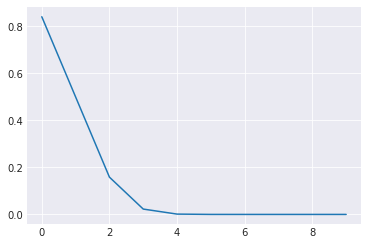

In [212]:
n_array = scipy.stats.norm(loc=numpy.arange(10))
p = n_array.cdf(1)
plt.plot(p)

In [213]:
p = scipy.stats.poisson(numpy.arange(100))

In [220]:
plt.plot(p.sf(numpy.array([5,6])))

ValueError: operands could not be broadcast together with shapes (2,) (100,) 

In [223]:
n = scipy.stats.norm.fit(data)
print(n)

(0.060582852075698704, 0.885156213831585)


In [222]:
n.pdf(0.5)

AttributeError: 'tuple' object has no attribute 'pdf'

## OK, We will have to abandon attempts to subclass scipy.stats.rv_continuous because:
1. Properties set on the `_gen` object are not accessible from the _gen methods, which means we can't store the data histogram.
2. I tried passing the data array around as a shape parameter (this way it would be stored when initialized as a `frozen` instance) but . . . if you pass an array as a shape parameter, it assumes you want an array of distributions. 

## So . . .

For now, we will simply implement a distinct class that does not directly inherit from scipy but provides a similar interface, as we were doing before.

Plan:
    * Initialize using frequencies (as before)
    * use a .fit @static method to generate the necessary parameters from the data
    * keep the .from_data() @class_method and have it call the above
    


In [468]:
DEFAULT_PSEUDOCOUNT = 0

class EmpiricalDistribution():
    def __init__(self, frequencies, support):
        assert support[1] >= support[0]

        self.a, self.b = support
        self.num_bins = len(frequencies)
        self.bin_size = self.support_size / self.num_bins
        self.bin_starts = numpy.linspace(self.a, self.b - self.bin_size, num=self.num_bins)
        self.bin_midpoints = self.bin_starts + self.bin_size / 2
        self.bin_ends = numpy.linspace(self.a + self.bin_size, self.b, num=self.num_bins)

        self.frequencies = numpy.array(frequencies)
        self.cdf_values = numpy.cumsum(self.frequencies)
        self.sf_values = numpy.cumsum(self.frequencies[::-1])[::-1]  # Double reversal needed to avoid numerical round-off errors close to 1. Maybe we can do all this better natively in logspace?

    @staticmethod
    def fit(data, num_bins=DEFAULT_BINS, pseudocount=DEFAULT_PSEUDOCOUNT, support=None):
        data = numpy.array(data)
        assert len(data) > 0, 'Data must have non-zero length'
        assert sum(numpy.isnan(data)) == 0, 'Data must not contain NaN'
        assert sum(numpy.isinf(data)) == 0, 'Data must not contain inf'
        assert sum(numpy.isneginf(data)) == 0, 'Data must not contain neginf'

        if support is None:
            support = (data.min(), data.max())

        counts, bins = numpy.histogram(data, bins=numpy.linspace(*support, num=num_bins + 1))
        counts += pseudocount
        frequencies = counts / counts.sum()
        return {'support':support, 'frequencies':frequencies}
        
    @classmethod
    def from_data(cls, data, num_bins=DEFAULT_BINS, pseudocount=0, support=None):
        return cls(**cls.fit(data, num_bins=num_bins, pseudocount=pseudocount, support=support))

    @property
    def densities(self):
        return self.frequencies / self.bin_size

    @property
    def support_size(self):
        return self.b - self.a

    def copy(self):
        return type(self)(frequencies=self.densities, support=(self.b, self.a))

    def mean(self):
        """
        Returns the expectation of the random variable described by this distribution
        """
        return numpy.sum(self.frequencies * self.bin_midpoints)

    def std(self):
        """
        Returns the standard deviation of the random variable described by this distribution
        """
        m = self.mean()
        return numpy.sqrt((((self.bin_midpoints - m) ** 2) * self.frequencies).sum())

    def estimate_mean_sample_distro(self, region_size, resample=False):
        """
        From the empirical distribution of a population, return the estimated
        distribution of the mean of a sample of that population of size
        :param:`region_size` over the same support.
        """
        new_frequencies = self.frequencies.copy()
        for i in range(1, region_size):
            new_frequencies = scipy.signal.convolve(new_frequencies, self.frequencies, mode='full', method='direct')
        if resample:
            new_frequencies = resample_array(arr=new_frequencies, new_size=self.num_bins, support=self.support)

        return type(self)(frequencies=new_frequencies, support=self.support)
    
    
#     def __add__(self, other):
#         """
#         """
#         try:
#             new_frequencies = scipy.signal.convolve(region_size.frequencies, self.frequencies, mode='full', method='direct')
#             if resample:
#                 new_frequencies = resample_array(arr=new_frequencies, new_size=self.num_bins, support=self.support)
                
#             type(self)(frequencies=new_frequencies, support=self.support)
            
#         return 

    def pdf(self, x, smoothing_bandwidth=DEFAULT_PDF_SMOOTHING_BANDWIDTH):
        """
        Returns the PDF evaluated at the points in :param:`x`

        Note: If the data only sparsely populates the frequency histogram
        (because the number of bins is large), then the PDF will be sparse
        as well, which could lead to problems. Use with caution.

        As an experimental workaround, try setting values of :param:`smoothing_bandwidth`
        to a value lower than the number of bins. This will redensify the frequency histogram
        and the corresponding PDF values by smoothing the frequencies with a gaussian
        kernel (equivalent to KDE). Values in the range 5-100 might work well.
        """
        if not smoothing_bandwidth:
            freq_array = self.frequencies
        else:
            freq_array = scipy.convolve(self.frequencies, gaussian_kernel(smoothing_bandwidth), mode='same')

        return freq_array[numpy.maximum(0, numpy.searchsorted(self.bin_starts, x) + BIN_OFFSET)] / self.bin_size

    def cdf(self, x):
        """
        Returns the CDF evaluated at the points in :param:`x`
        """
        return self.cdf_values[numpy.maximum(0, numpy.searchsorted(self.bin_starts, x) + BIN_OFFSET)]

    def sf(self, x):
        """
        Return the survival function (1 - cdf) at :param x:
        """
        return self.sf_values[numpy.maximum(0, numpy.searchsorted(self.bin_starts, x) + BIN_OFFSET)]
    
    def isf(self, x):
        """
        Return the inverse survival function (1 - sf) at :param x:
        """
        return 1 - self.sf_values[numpy.maximum(0, numpy.searchsorted(self.bin_starts, x) + BIN_OFFSET)]

    def logsf(self, x):
        # ToDo: Build in standard approximation (should never return 0 p-values)
        return numpy.log(numpy.maximum(self.sf(x), MIN_PVALUE))

    def as_frequency_series(self):
        """
        Return a pandas.Series representing the data frequencies with the left edge of each
        bin as the index.
        """
        return pandas.Series(self.frequencies, index=self.bin_starts)
    
    
## Implement convolution stuff by overloading builtin arithmetic methods    

## Develop arithmetic methods

### First we need some naive examples to use as a test set

In [469]:
def span(vec):
    return vec.max() - vec.min()

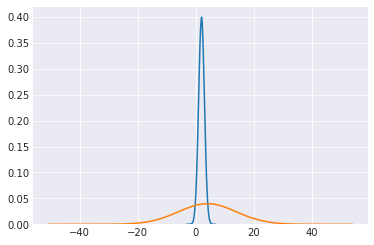

1.9990227876820783 0.9984271388548005 0.9992132599474451 9.707978258484799
4.0012970215738894 99.93952342645855 9.99697571400764 100.90856918851816


In [656]:
n = 1000000

numpy.random.seed(2)

X = scipy.stats.norm(loc=2, scale=1).rvs(size=n)
Y = scipy.stats.norm(loc=4, scale=10).rvs(size=n)

seaborn.kdeplot(X)
seaborn.kdeplot(Y)
plt.show()

print(numpy.mean(X), numpy.var(X), numpy.std(X), span(X))
print(numpy.mean(Y), numpy.var(Y), numpy.std(Y), span(Y))

### Addition

In [657]:
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
print(xmin, xmax)
print(ymin, ymax)

-2.9778644455537195 6.730113812931079
-48.85738987679171 52.05117931172646


In [719]:
NUM_BINS = 100

In [720]:
# X = numpy.array([5, 10])
# Y = numpy.array([2,4])

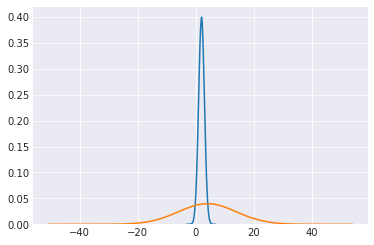

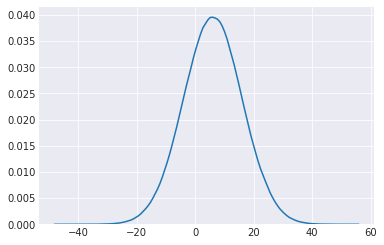

6.000319809255968 100.97166952010231 10.04846602821059 100.17103589414762
10.046788072081213


In [721]:
seaborn.kdeplot(X)
seaborn.kdeplot(Y)
plt.show()

result = X + Y

# predicted_min = X.min() + Y.min()
# predicted_max = X.max() + Y.max()

predicted_std = numpy.sqrt(numpy.var(X) + numpy.var(Y))

seaborn.kdeplot(result)
plt.show()
print(numpy.mean(result), numpy.var(result), numpy.std(result), span(result))
print(predicted_std)
# print(result.min(), result.max())
# print(predicted_min, predicted_max)

In [722]:
X_distro = EmpiricalDistribution.from_data(X, num_bins=NUM_BINS)
Y_distro = EmpiricalDistribution.from_data(Y, num_bins=NUM_BINS)

In [723]:
Y.std(), result.std()

(9.99697571400764, 10.04846602821059)

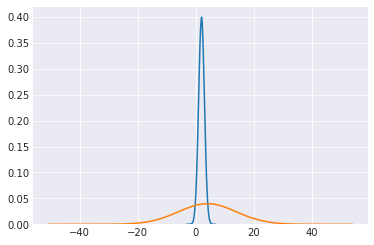

In [724]:
seaborn.kdeplot(X)
seaborn.kdeplot(Y)

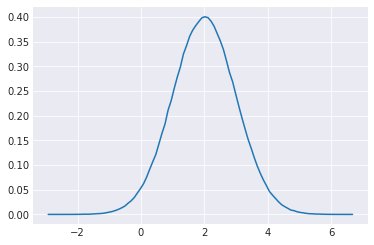

In [725]:
plt.plot(X_distro.bin_midpoints, X_distro.densities)

In [726]:
def display_freqs(bins, freqs):
    for b, f in zip(bins, freqs):
        print(b,f)

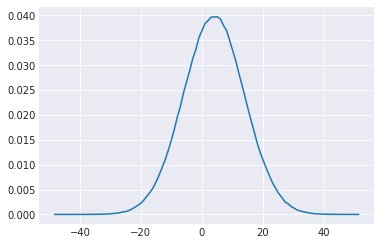

In [727]:
plt.plot(Y_distro.bin_midpoints, Y_distro.densities)

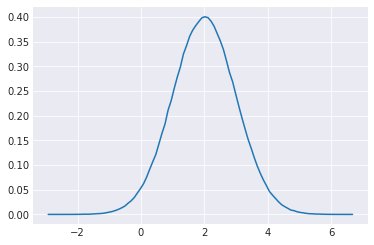

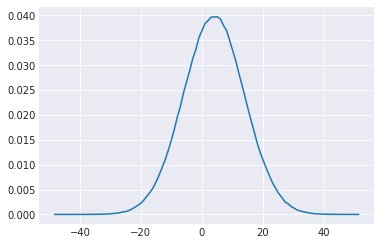

-2.9778644455537195 6.730113812931079
-2.9778644455537195 6.730113812931079
-48.85738987679171 52.05117931172646
-48.85738987679171 52.05117931172646

-46.21580906131135 53.95522683283627
-51.83525432234543 58.78129312465754


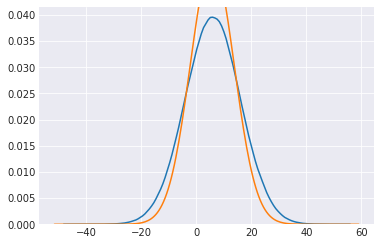

In [728]:
plt.plot(X_distro.bin_midpoints, X_distro.densities)
# seaborn.kdeplot(X)
plt.show()

plt.plot(Y_distro.bin_midpoints, Y_distro.densities)
# seaborn.kdeplot(Y)
plt.show()

convolved_freqs = scipy.signal.convolve(X_distro.frequencies, Y_distro.frequencies, mode='full', method='auto')
#         if resample:
#             new_frequencies = resample_array(arr=new_frequencies, new_size=self.num_bins, support=self.support)
# seaborn.kdeplot(Y)
new_min = X_distro.a + Y_distro.a
new_max = X_distro.b + Y_distro.b
new_bin_size = (new_max - new_min) / (NUM_BINS * 2 - 1)

new_bins = numpy.linspace(new_min, new_max, num=(NUM_BINS * 2 - 1)) + new_bin_size / 2

seaborn.kdeplot(result)
# plt.show()
plt.plot(new_bins, convolved_freqs / new_bin_size)


print(X.min(), X.max())
print(X_distro.a, X_distro.b)
print(Y.min(), Y.max())
print(Y_distro.a, Y_distro.b)
print()
print(result.min(), result.max())
print(new_min, new_max)

In [755]:
print(X.min(), X_distro.bin_starts[0], X.max(), X_distro.bin_ends[-1])

print(Y.min(), Y_distro.bin_starts[0], Y.max(), Y_distro.bin_ends[-1])

print(min_val, max_val)
print(X_distro.bin_size, Y_distro.bin_size, new_bin_size)

-2.9778644455537195 -2.9778644455537195 6.730113812931079 6.730113812931079
-48.85738987679171 -48.85738987679171 52.05117931172646 52.05117931172646
-51.83525432234543 58.78129312465754
0.09707978258484799 1.0090856918851816 0.5558620474723739


In [766]:
result_distro = EmpiricalDistribution.from_data(result, num_bins=199)

In [767]:
print(result_distro.bin_starts[0], result_distro.bin_ends[-1], result_distro.bin_size)

-46.21580906131135 53.95522683283627 0.5033720396690835


-51.83525432234543 58.78129312465754
0.09707978258484799 1.0090856918851816 0.560887173100518 0.5530827372350148
-51.83525432234543 59.220405951557034


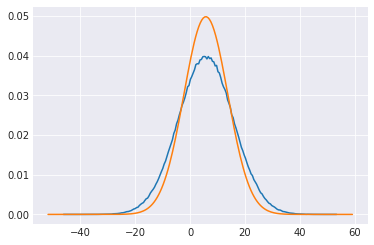

In [771]:
min_val = X_distro.bin_starts[0] + Y_distro.bin_starts[0]
max_val = X_distro.bin_ends[-1] + Y_distro.bin_ends[-1]
new_binstarts = numpy.linspace(min_val, max_val+1, num=len(convolved_freqs)+1)[:-1]
# print(new_bins)

new_bin_size = new_binstarts[1] - new_binstarts[0]
# new_bins += new_bin_size / 2
print(min_val, max_val)
avg_bin_size = numpy.mean((X_distro.bin_size, Y_distro.bin_size))
print(X_distro.bin_size, Y_distro.bin_size, new_bin_size, avg_bin_size)


print(new_bins[0], new_bins[-1])


# seaborn.kdeplot(result)
# plt.show()
plt.plot(result_distro.bin_starts, result_distro.frequencies / result_distro.bin_size)
plt.plot(new_binstarts, convolved_freqs / new_bin_size)

In [761]:
X_distro.frequencies.sum(), Y_distro.frequencies.sum(), convolved_freqs.sum()

(1.0, 1.0, 1.0)

In [ ]:
n = 1000000
NUM_BINS=1000

numpy.random.seed(2)

X = scipy.stats.norm(loc=2, scale=1).rvs(size=n)
Y = scipy.stats.norm(loc=4, scale=10).rvs(size=n)

X_distro = EmpiricalDistribution.from_data(X, num_bins=NUM_BINS)
Y_distro = EmpiricalDistribution.from_data(Y, num_bins=NUM_BINS)

seaborn.kdeplot(X, label='X KDE')
plt.plot(X_distro.bin_midpoints, X_distro.frequencies / X_distro.bin_size, label='X_distro')
plt.legend()
plt.suptitle('X')
plt.show()

seaborn.kdeplot(Y, label='Y KDE')
plt.plot(Y_distro.bin_midpoints, Y_distro.frequencies / Y_distro.bin_size, label='Y_distro')
plt.legend()
plt.suptitle('Y')
plt.show()

print(numpy.mean(X), numpy.var(X), numpy.std(X), span(X))
print(numpy.mean(Y), numpy.var(Y), numpy.std(Y), span(Y))

convolved_freqs = scipy.signal.convolve(X_distro.frequencies, Y_distro.frequencies, mode='full', method='auto')

result = X + Y

result_distro = EmpiricalDistribution.from_data(result, num_bins=len(convolved_freqs))

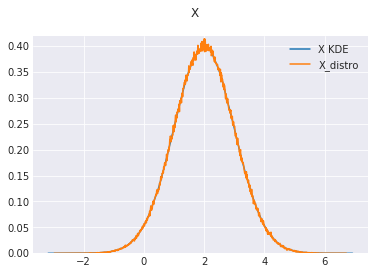

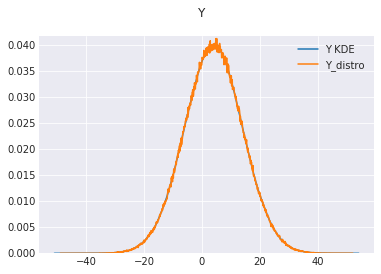

1.9990227876820783 0.9984271388548005 0.9992132599474451 9.707978258484799
4.0012970215738894 99.93952342645855 9.99697571400764 100.90856918851816


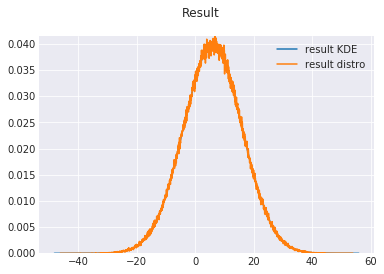

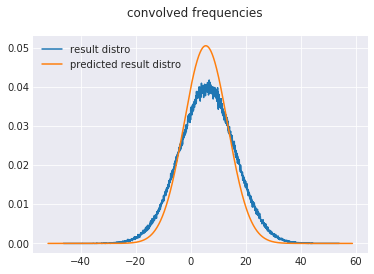

In [822]:
seaborn.kdeplot(result, label='result KDE')
plt.plot(result_distro.bin_midpoints, result_distro.frequencies / result_distro.bin_size, label='result distro')
plt.legend()
plt.suptitle('Result')
plt.show()

new_min = X_distro.a + Y_distro.a
new_max = X_distro.b + Y_distro.b

new_bin_starts = numpy.linspace(new_min, new_max, num=len(convolved_freqs)+1)[:-1]
new_bin_size = new_bin_starts[1] - new_bin_starts[0]
new_bin_midpoints = new_bin_starts + new_bin_size / 2

plt.plot(result_distro.bin_midpoints, result_distro.frequencies / result_distro.bin_size, label='result distro')
plt.plot(new_bin_midpoints, convolved_freqs / new_bin_size, label='predicted result distro')
plt.legend()
plt.suptitle('convolved frequencies')
plt.show()

In [798]:
X.max(), Y.max()

(13, 17)

## Small Poisson

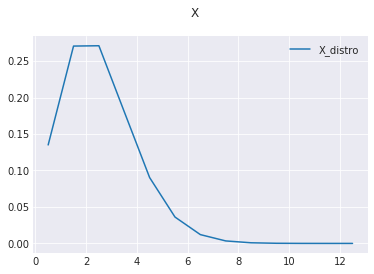

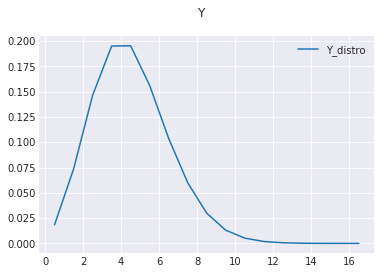

X: 0-13, Y:0-17
X bin size:1.0 Y bin size: 1.0


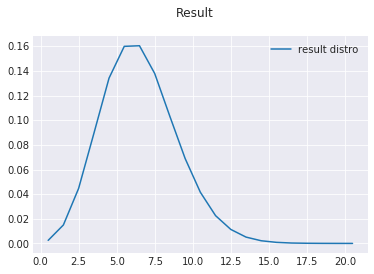

Predicted result min, max: 0, 30, span: 30


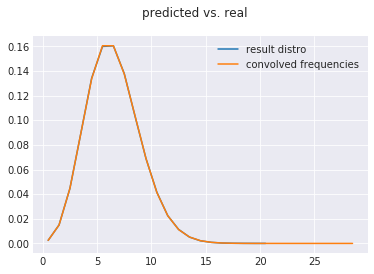

In [824]:
n = 1000000
NUM_BINS=1000

numpy.random.seed(2)

X = scipy.stats.poisson(2).rvs(size=n)
Y = scipy.stats.poisson(4).rvs(size=n)

X_distro = EmpiricalDistribution.from_data(X, num_bins=X.max())
Y_distro = EmpiricalDistribution.from_data(Y, num_bins=Y.max())

# seaborn.kdeplot(X, label='X KDE')
plt.plot(X_distro.bin_midpoints, X_distro.frequencies / X_distro.bin_size, label='X_distro')
plt.legend()
plt.suptitle('X')
plt.show()

# seaborn.kdeplot(Y, label='Y KDE')
plt.plot(Y_distro.bin_midpoints, Y_distro.frequencies / Y_distro.bin_size, label='Y_distro')
plt.legend()
plt.suptitle('Y')
plt.show()

# print(numpy.mean(X), numpy.var(X), numpy.std(X), span(X))
# print(numpy.mean(Y), numpy.var(Y), numpy.std(Y), span(Y))
print('X: {}-{}, Y:{}-{}'.format(X.min(),X.max(), Y.min(), Y.max()))
print('X bin size:{} Y bin size: {}'.format(X_distro.bin_size, Y_distro.bin_size))

convolved_freqs = scipy.signal.convolve(X_distro.frequencies, Y_distro.frequencies, mode='full', method='auto')

result = X + Y

result_distro = EmpiricalDistribution.from_data(result, num_bins=result.max()-result.min())


# seaborn.kdeplot(result, label='result KDE')
plt.plot(result_distro.bin_midpoints, result_distro.frequencies / result_distro.bin_size, label='result distro')
plt.legend()
plt.suptitle('Result')
plt.show()

new_min = X_distro.a + Y_distro.a
new_max = X_distro.b + Y_distro.b

print('Predicted result min, max: {}, {}, span: {}'.format(new_min, new_max, new_max-new_min))
new_bin_starts = numpy.linspace(new_min, new_max - 1, num=len(convolved_freqs)+1)[:-1]
new_bin_size = new_bin_starts[1] - new_bin_starts[0]
new_bin_midpoints = new_bin_starts + new_bin_size / 2

plt.plot(result_distro.bin_midpoints, result_distro.frequencies / result_distro.bin_size, label='result distro')
plt.plot(new_bin_midpoints, convolved_freqs / new_bin_size, label='convolved frequencies')
plt.legend()
plt.suptitle('predicted vs. real')
plt.show()

In [825]:
result_distro.bin_starts

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [826]:
new_bin_starts

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28.])

## Works because bin sizes are the same

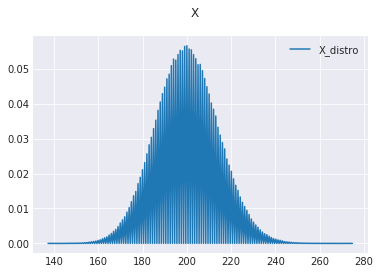

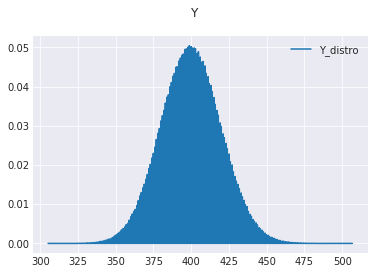

X: 137-275, Y:305-507
X bin size:0.5018181818181818 Y bin size: 0.398422090729783


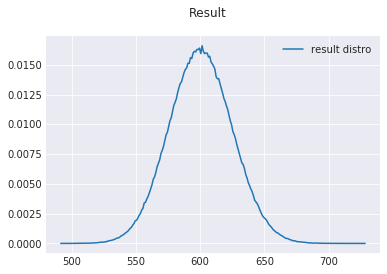

Predicted result min, max: 442, 782, span: 340


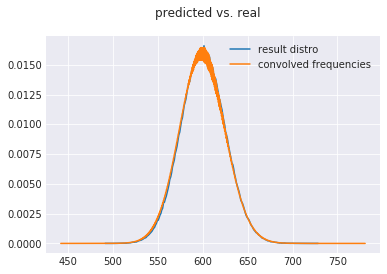

In [828]:
n = 1000000
NUM_BINS=1000

numpy.random.seed(2)

X = scipy.stats.poisson(200).rvs(size=n)
Y = scipy.stats.poisson(400).rvs(size=n)

X_distro = EmpiricalDistribution.from_data(X, num_bins=X.max())
Y_distro = EmpiricalDistribution.from_data(Y, num_bins=Y.max())

# seaborn.kdeplot(X, label='X KDE')
plt.plot(X_distro.bin_midpoints, X_distro.frequencies / X_distro.bin_size, label='X_distro')
plt.legend()
plt.suptitle('X')
plt.show()

# seaborn.kdeplot(Y, label='Y KDE')
plt.plot(Y_distro.bin_midpoints, Y_distro.frequencies / Y_distro.bin_size, label='Y_distro')
plt.legend()
plt.suptitle('Y')
plt.show()

# print(numpy.mean(X), numpy.var(X), numpy.std(X), span(X))
# print(numpy.mean(Y), numpy.var(Y), numpy.std(Y), span(Y))
print('X: {}-{}, Y:{}-{}'.format(X.min(),X.max(), Y.min(), Y.max()))
print('X bin size:{} Y bin size: {}'.format(X_distro.bin_size, Y_distro.bin_size))

convolved_freqs = scipy.signal.convolve(X_distro.frequencies, Y_distro.frequencies, mode='full', method='auto')

result = X + Y

result_distro = EmpiricalDistribution.from_data(result, num_bins=result.max()-result.min())


# seaborn.kdeplot(result, label='result KDE')
plt.plot(result_distro.bin_midpoints, result_distro.frequencies / result_distro.bin_size, label='result distro')
plt.legend()
plt.suptitle('Result')
plt.show()

new_min = X_distro.a + Y_distro.a
new_max = X_distro.b + Y_distro.b

print('Predicted result min, max: {}, {}, span: {}'.format(new_min, new_max, new_max-new_min))
new_bin_starts = numpy.linspace(new_min, new_max - 1, num=len(convolved_freqs)+1)[:-1]
new_bin_size = new_bin_starts[1] - new_bin_starts[0]
new_bin_midpoints = new_bin_starts + new_bin_size / 2

plt.plot(result_distro.bin_midpoints, result_distro.frequencies / result_distro.bin_size, label='result distro')
plt.plot(new_bin_midpoints, convolved_freqs / new_bin_size, label='convolved frequencies')
plt.legend()
plt.suptitle('predicted vs. real')
plt.show()

## Go back to examining bin size differences

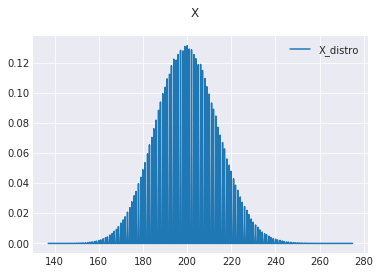

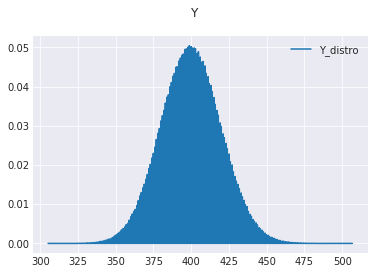

X: 137-275, Y:305-507
X bin size:0.21630094043887146 Y bin size: 0.398422090729783


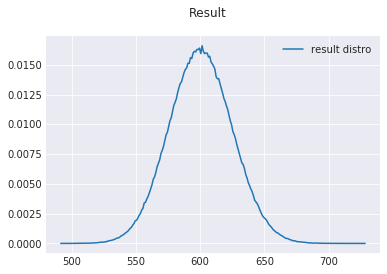

Predicted result min, max: 442, 782, span: 340


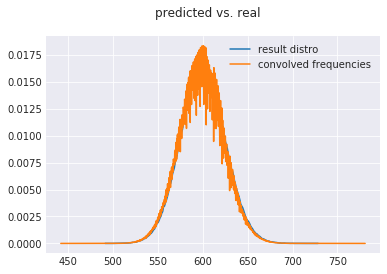

In [833]:
n = 1000000
NUM_BINS=1000

numpy.random.seed(2)

X = scipy.stats.poisson(200).rvs(size=n)
Y = scipy.stats.poisson(400).rvs(size=n)

X_distro = EmpiricalDistribution.from_data(X, num_bins=int(X.max() * 2.32))
Y_distro = EmpiricalDistribution.from_data(Y, num_bins=int(Y.max()))

# seaborn.kdeplot(X, label='X KDE')
plt.plot(X_distro.bin_midpoints, X_distro.frequencies / X_distro.bin_size, label='X_distro')
plt.legend()
plt.suptitle('X')
plt.show()

# seaborn.kdeplot(Y, label='Y KDE')
plt.plot(Y_distro.bin_midpoints, Y_distro.frequencies / Y_distro.bin_size, label='Y_distro')
plt.legend()
plt.suptitle('Y')
plt.show()

# print(numpy.mean(X), numpy.var(X), numpy.std(X), span(X))
# print(numpy.mean(Y), numpy.var(Y), numpy.std(Y), span(Y))
print('X: {}-{}, Y:{}-{}'.format(X.min(),X.max(), Y.min(), Y.max()))
print('X bin size:{} Y bin size: {}'.format(X_distro.bin_size, Y_distro.bin_size))

convolved_freqs = scipy.signal.convolve(X_distro.frequencies, Y_distro.frequencies, mode='full', method='auto')

result = X + Y

result_distro = EmpiricalDistribution.from_data(result, num_bins=result.max()-result.min())


# seaborn.kdeplot(result, label='result KDE')
plt.plot(result_distro.bin_midpoints, result_distro.frequencies / result_distro.bin_size, label='result distro')
plt.legend()
plt.suptitle('Result')
plt.show()

new_min = X_distro.a + Y_distro.a
new_max = X_distro.b + Y_distro.b

print('Predicted result min, max: {}, {}, span: {}'.format(new_min, new_max, new_max-new_min))
new_bin_starts = numpy.linspace(new_min, new_max - 1, num=len(convolved_freqs)+1)[:-1]
new_bin_size = new_bin_starts[1] - new_bin_starts[0]
new_bin_midpoints = new_bin_starts + new_bin_size / 2

plt.plot(result_distro.bin_midpoints, result_distro.frequencies / result_distro.bin_size, label='result distro')
plt.plot(new_bin_midpoints, convolved_freqs / new_bin_size, label='convolved frequencies')
plt.legend()
plt.suptitle('predicted vs. real')
plt.show()

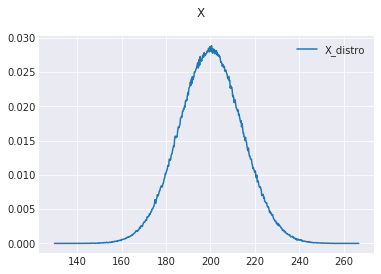

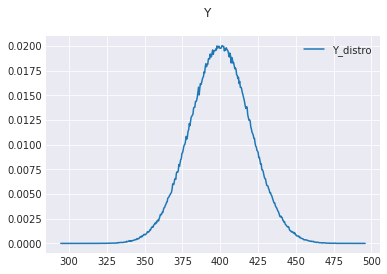

X: 129.60236589443102-266.89391105815446, Y:294.2852202464166-496.1023586234529
X bin size:0.2217957110884062 Y bin size: 0.4068893918891861


/home/dskola/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:29: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


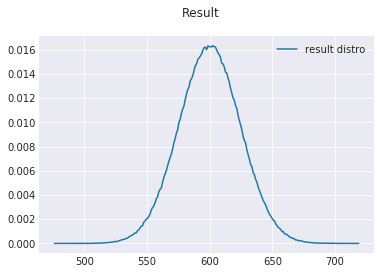

Predicted result min, max: 423.8875861408476, 762.9962696816074, span: 339.1086835407598


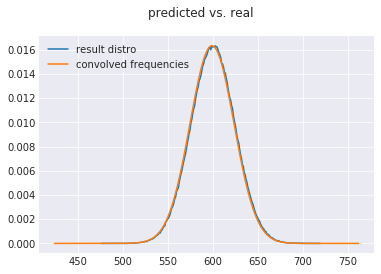

In [834]:
n = 1000000
NUM_BINS=1000

numpy.random.seed(2)

X = scipy.stats.norm(loc=200, scale=200**0.5).rvs(size=n)
Y = scipy.stats.norm(loc=400, scale=400**0.5).rvs(size=n)

X_distro = EmpiricalDistribution.from_data(X, num_bins=int(X.max() * 2.32))
Y_distro = EmpiricalDistribution.from_data(Y, num_bins=int(Y.max()))

# seaborn.kdeplot(X, label='X KDE')
plt.plot(X_distro.bin_midpoints, X_distro.frequencies / X_distro.bin_size, label='X_distro')
plt.legend()
plt.suptitle('X')
plt.show()

# seaborn.kdeplot(Y, label='Y KDE')
plt.plot(Y_distro.bin_midpoints, Y_distro.frequencies / Y_distro.bin_size, label='Y_distro')
plt.legend()
plt.suptitle('Y')
plt.show()

# print(numpy.mean(X), numpy.var(X), numpy.std(X), span(X))
# print(numpy.mean(Y), numpy.var(Y), numpy.std(Y), span(Y))
print('X: {}-{}, Y:{}-{}'.format(X.min(),X.max(), Y.min(), Y.max()))
print('X bin size:{} Y bin size: {}'.format(X_distro.bin_size, Y_distro.bin_size))

convolved_freqs = scipy.signal.convolve(X_distro.frequencies, Y_distro.frequencies, mode='full', method='auto')

result = X + Y

result_distro = EmpiricalDistribution.from_data(result, num_bins=result.max()-result.min())


# seaborn.kdeplot(result, label='result KDE')
plt.plot(result_distro.bin_midpoints, result_distro.frequencies / result_distro.bin_size, label='result distro')
plt.legend()
plt.suptitle('Result')
plt.show()

new_min = X_distro.a + Y_distro.a
new_max = X_distro.b + Y_distro.b

print('Predicted result min, max: {}, {}, span: {}'.format(new_min, new_max, new_max-new_min))
new_bin_starts = numpy.linspace(new_min, new_max - 1, num=len(convolved_freqs)+1)[:-1]
new_bin_size = new_bin_starts[1] - new_bin_starts[0]
new_bin_midpoints = new_bin_starts + new_bin_size / 2

plt.plot(result_distro.bin_midpoints, result_distro.frequencies / result_distro.bin_size, label='result distro')
plt.plot(new_bin_midpoints, convolved_freqs / new_bin_size, label='convolved frequencies')
plt.legend()
plt.suptitle('predicted vs. real')
plt.show()

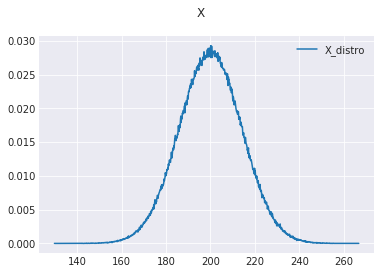

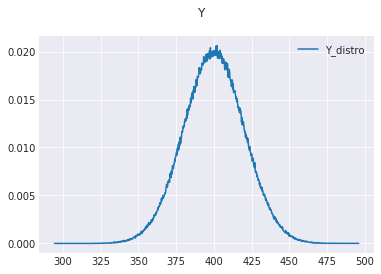

X: 129.60236589443102-266.89391105815446, Y:294.2852202464166-496.1023586234529
X bin size:0.13729154516372344 Y bin size: 0.20181713837703633


/home/dskola/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:29: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


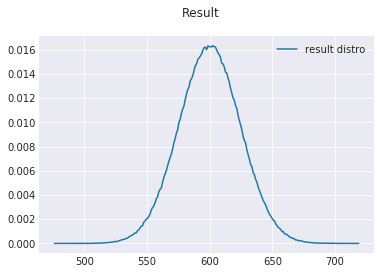

Predicted result min, max: 423.8875861408476, 762.9962696816074, span: 339.1086835407598


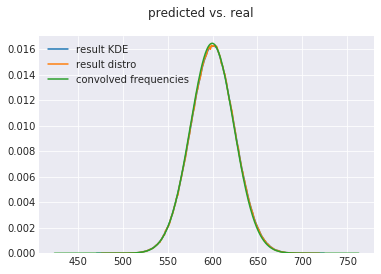

In [842]:
n = 1000000
NUM_BINS=1000

numpy.random.seed(2)

X = scipy.stats.norm(loc=200, scale=200**0.5).rvs(size=n)
Y = scipy.stats.norm(loc=400, scale=400**0.5).rvs(size=n)

X_distro = EmpiricalDistribution.from_data(X, num_bins=int(NUM_BINS))
Y_distro = EmpiricalDistribution.from_data(Y, num_bins=int(NUM_BINS))

# seaborn.kdeplot(X, label='X KDE')
plt.plot(X_distro.bin_midpoints, X_distro.frequencies / X_distro.bin_size, label='X_distro')
plt.legend()
plt.suptitle('X')
plt.show()

# seaborn.kdeplot(Y, label='Y KDE')
plt.plot(Y_distro.bin_midpoints, Y_distro.frequencies / Y_distro.bin_size, label='Y_distro')
plt.legend()
plt.suptitle('Y')
plt.show()

# print(numpy.mean(X), numpy.var(X), numpy.std(X), span(X))
# print(numpy.mean(Y), numpy.var(Y), numpy.std(Y), span(Y))
print('X: {}-{}, Y:{}-{}'.format(X.min(),X.max(), Y.min(), Y.max()))
print('X bin size:{} Y bin size: {}'.format(X_distro.bin_size, Y_distro.bin_size))

convolved_freqs = scipy.signal.convolve(X_distro.frequencies, Y_distro.frequencies, mode='full', method='auto')

result = X + Y

result_distro = EmpiricalDistribution.from_data(result, num_bins=result.max()-result.min())


# seaborn.kdeplot(result, label='result KDE')
plt.plot(result_distro.bin_midpoints, result_distro.frequencies / result_distro.bin_size, label='result distro')
plt.legend()
plt.suptitle('Result')
plt.show()

new_min = X_distro.a + Y_distro.a
new_max = X_distro.b + Y_distro.b


print('Predicted result min, max: {}, {}, span: {}'.format(new_min, new_max, new_max-new_min))
new_bin_starts = numpy.linspace(new_min, new_max - new_bin_size, num=len(convolved_freqs)+1)[:-1]
new_bin_size = new_bin_starts[1] - new_bin_starts[0]
new_bin_midpoints = new_bin_starts + new_bin_size / 2

seaborn.kdeplot(result, label='result KDE')
plt.plot(result_distro.bin_midpoints, result_distro.frequencies / result_distro.bin_size, label='result distro')
plt.plot(new_bin_midpoints, convolved_freqs / new_bin_size, label='convolved frequencies')
plt.legend()
plt.suptitle('predicted vs. real')
plt.show()

# Seems pretty good but let' go back to less bins and work out the offsets

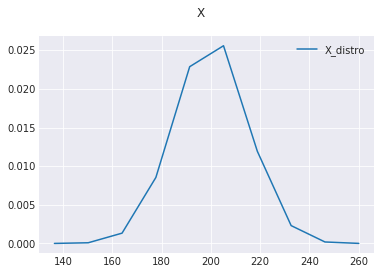

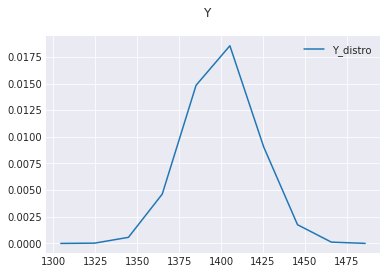

X: 129.60236589443102-266.89391105815446, Y:1294.2852202464167-1496.1023586234528
X bin size:13.729154516372343 Y bin size: 20.181713837703615


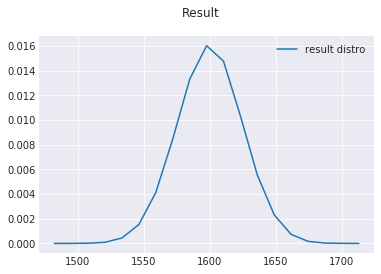

Predicted result min, max: 1423.8875861408476, 1762.9962696816074, span: 339.1086835407598


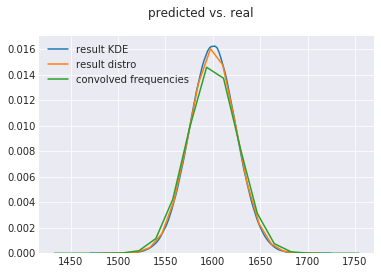

In [851]:
n = 1000000
NUM_BINS=10

numpy.random.seed(2)

X = scipy.stats.norm(loc=200, scale=200**0.5).rvs(size=n)
Y = scipy.stats.norm(loc=1400, scale=400**0.5).rvs(size=n)

X_distro = EmpiricalDistribution.from_data(X, num_bins=int(NUM_BINS))
Y_distro = EmpiricalDistribution.from_data(Y, num_bins=int(NUM_BINS))

# seaborn.kdeplot(X, label='X KDE')
plt.plot(X_distro.bin_midpoints, X_distro.frequencies / X_distro.bin_size, label='X_distro')
plt.legend()
plt.suptitle('X')
plt.show()

# seaborn.kdeplot(Y, label='Y KDE')
plt.plot(Y_distro.bin_midpoints, Y_distro.frequencies / Y_distro.bin_size, label='Y_distro')
plt.legend()
plt.suptitle('Y')
plt.show()

# print(numpy.mean(X), numpy.var(X), numpy.std(X), span(X))
# print(numpy.mean(Y), numpy.var(Y), numpy.std(Y), span(Y))
print('X: {}-{}, Y:{}-{}'.format(X.min(),X.max(), Y.min(), Y.max()))
print('X bin size:{} Y bin size: {}'.format(X_distro.bin_size, Y_distro.bin_size))

convolved_freqs = scipy.signal.convolve(X_distro.frequencies, Y_distro.frequencies, mode='full', method='auto')

result = X + Y

result_distro = EmpiricalDistribution.from_data(result, num_bins=len(convolved_freqs))

# seaborn.kdeplot(result, label='result KDE')
plt.plot(result_distro.bin_midpoints, result_distro.frequencies / result_distro.bin_size, label='result distro')
plt.legend()
plt.suptitle('Result')
plt.show()

new_min = X_distro.a + Y_distro.a
new_max = X_distro.b + Y_distro.b


print('Predicted result min, max: {}, {}, span: {}'.format(new_min, new_max, new_max-new_min))
new_bin_starts = numpy.linspace(new_min, new_max, num=len(convolved_freqs)+1)[:-1]
new_bin_size = new_bin_starts[1] - new_bin_starts[0]
new_bin_midpoints = new_bin_starts + new_bin_size / 2

seaborn.kdeplot(result, label='result KDE')
plt.plot(result_distro.bin_midpoints, result_distro.frequencies / result_distro.bin_size, label='result distro')
plt.plot(new_bin_midpoints, convolved_freqs / new_bin_size, label='convolved frequencies')
plt.legend()
plt.suptitle('predicted vs. real')
plt.show()

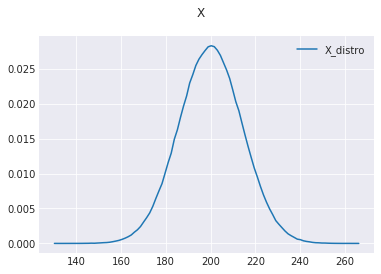

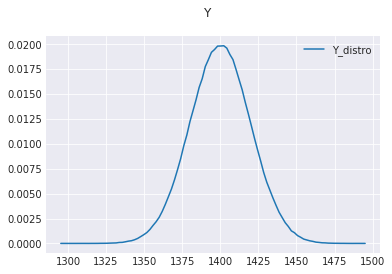

X: 129.60236589443102-266.89391105815446, Y:1294.2852202464167-1496.1023586234528
X bin size:1.3729154516372344 Y bin size: 2.0181713837703614


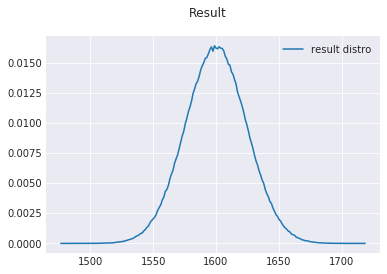

Predicted result min, max: 1423.8875861408476, 1762.9962696816074, span: 339.1086835407598


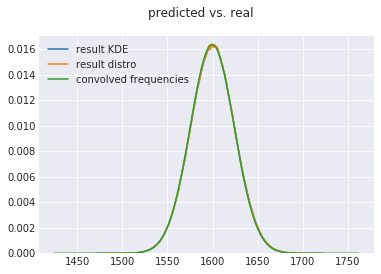

In [856]:
n = 1000000
NUM_BINS=100

numpy.random.seed(2)

X = scipy.stats.norm(loc=200, scale=200**0.5).rvs(size=n)
Y = scipy.stats.norm(loc=1400, scale=400**0.5).rvs(size=n)

X_distro = EmpiricalDistribution.from_data(X, num_bins=int(NUM_BINS))
Y_distro = EmpiricalDistribution.from_data(Y, num_bins=int(NUM_BINS))

# seaborn.kdeplot(X, label='X KDE')
plt.plot(X_distro.bin_midpoints, X_distro.frequencies / X_distro.bin_size, label='X_distro')
plt.legend()
plt.suptitle('X')
plt.show()

# seaborn.kdeplot(Y, label='Y KDE')
plt.plot(Y_distro.bin_midpoints, Y_distro.frequencies / Y_distro.bin_size, label='Y_distro')
plt.legend()
plt.suptitle('Y')
plt.show()

# print(numpy.mean(X), numpy.var(X), numpy.std(X), span(X))
# print(numpy.mean(Y), numpy.var(Y), numpy.std(Y), span(Y))
print('X: {}-{}, Y:{}-{}'.format(X.min(),X.max(), Y.min(), Y.max()))
print('X bin size:{} Y bin size: {}'.format(X_distro.bin_size, Y_distro.bin_size))

convolved_freqs = scipy.signal.convolve(X_distro.frequencies, Y_distro.frequencies, mode='full', method='auto')

result = X + Y

result_distro = EmpiricalDistribution.from_data(result, num_bins=len(convolved_freqs))

# seaborn.kdeplot(result, label='result KDE')
plt.plot(result_distro.bin_midpoints, result_distro.frequencies / result_distro.bin_size, label='result distro')
plt.legend()
plt.suptitle('Result')
plt.show()

new_min = X_distro.a + Y_distro.a
new_max = X_distro.b + Y_distro.b


print('Predicted result min, max: {}, {}, span: {}'.format(new_min, new_max, new_max-new_min))
new_bin_starts = numpy.linspace(new_min, new_max, num=len(convolved_freqs)+1)[:-1]
new_bin_size = new_bin_starts[1] - new_bin_starts[0]
new_bin_midpoints = new_bin_starts + new_bin_size / 2

seaborn.kdeplot(result, label='result KDE')
plt.plot(result_distro.bin_midpoints, result_distro.frequencies / result_distro.bin_size, label='result distro')
plt.plot(new_bin_midpoints, convolved_freqs / new_bin_size, label='convolved frequencies')
plt.legend()
plt.suptitle('predicted vs. real')
plt.show()

In [857]:
from pgtools import toolbox

In [859]:
toolbox.pearson_correlation(convolved_freqs, result_distro.frequencies)

0.9663228369712459

# Dive into toy examples of convolution

In [578]:
def step_by_step_convolution(vec_a, vec_b):
    vec_b = vec_b[::-1]
    
    output = numpy.zeros(len(vec_a) + len(vec_b) - 1)
    for i in range(len(output)):
        

SyntaxError: unexpected EOF while parsing (<ipython-input-578-699d3d3fe2a3>, line 2)

In [579]:
display_freqs(X_distro.bin_midpoints, X_distro.frequencies)
print()
display_freqs(Y_distro.bin_midpoints, Y_distro.frequencies)


5.25 0.5
5.75 0.0
6.25 0.0
6.75 0.0
7.25 0.0
7.75 0.0
8.25 0.0
8.75 0.0
9.25 0.0
9.75 0.5

2.1 0.5
2.3000000000000003 0.0
2.5 0.0
2.7 0.0
2.9 0.0
3.1 0.0
3.3000000000000003 0.0
3.5 0.0
3.6999999999999997 0.0
3.9 0.5


[ 7 12  9 14]
7.184210526315789 0.25
7.573099415204679 0.0
7.961988304093567 0.0
8.350877192982455 0.0
8.739766081871345 0.0
9.128654970760234 0.0
9.517543859649123 0.0
9.90643274853801 0.0
10.2953216374269 0.0
10.68421052631579 0.5
11.073099415204679 0.0
11.461988304093568 0.0
11.850877192982457 0.0
12.239766081871345 0.0
12.628654970760234 0.0
13.017543859649122 0.0
13.40643274853801 0.0
13.7953216374269 0.0
14.18421052631579 0.25


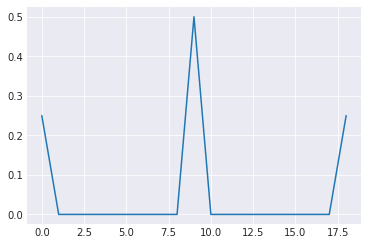

In [580]:
real_possibilities = numpy.array([2+5, 2+10, 4+5, 4+10])
print(real_possibilities)
display_freqs(new_bins, convolved_freqs)
plt.plot(convolved_freqs)

# Discrete convolution experiments

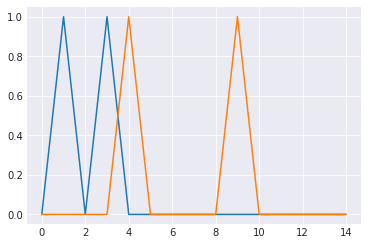

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     1.0
6     0.0
7     1.0
8     0.0
9     0.0
10    1.0
11    0.0
12    1.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
dtype: float64


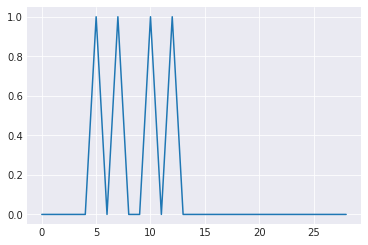

In [591]:
array_1 = numpy.zeros(15)
array_1[1] = 1
array_1[3] = 1
array_2 = numpy.zeros(15)
array_2[4] = 1
array_2[9] = 1
array_r = scipy.convolve(array_1, array_2, mode='full')

plt.plot(array_1)
plt.plot(array_2)
plt.show()
print(pandas.Series(array_r))

plt.plot(array_r)

## Can we reproduce edge effects?

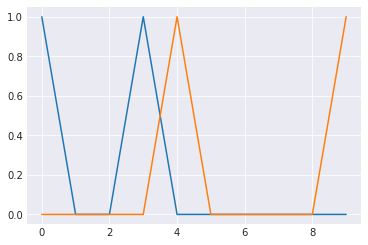

0     0.0
1     0.0
2     0.0
3     0.0
4     1.0
5     0.0
6     0.0
7     1.0
8     0.0
9     1.0
10    0.0
11    0.0
12    1.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
dtype: float64


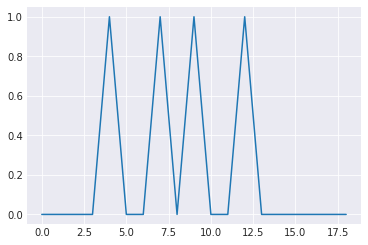

In [602]:
array_1 = numpy.zeros(10)
array_1[0] = 1
array_1[3] = 1
array_2 = numpy.zeros(10)
array_2[4] = 1
array_2[9] = 1
array_r = scipy.convolve(array_1, array_2, mode='full')

plt.plot(array_1)
plt.plot(array_2)
plt.show()
print(pandas.Series(array_r))

plt.plot(array_r)

## What about different vector ranges?

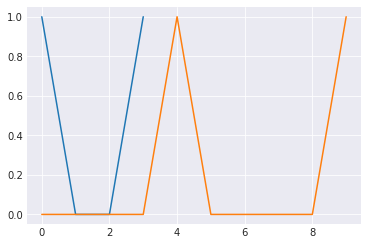

0     0.0
1     0.0
2     0.0
3     0.0
4     1.0
5     0.0
6     0.0
7     1.0
8     0.0
9     1.0
10    0.0
11    0.0
12    1.0
dtype: float64


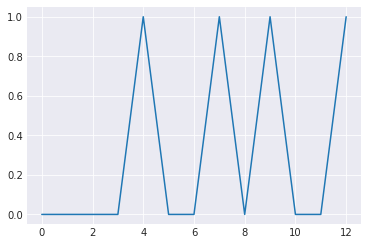

In [603]:
array_1 = numpy.zeros(4)
array_1[0] = 1
array_1[3] = 1
array_2 = numpy.zeros(10)
array_2[4] = 1
array_2[9] = 1
array_r = scipy.convolve(array_1, array_2, mode='full')

plt.plot(array_1)
plt.plot(array_2)
plt.show()
print(pandas.Series(array_r))

plt.plot(array_r)

In [604]:
array_2

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1.])

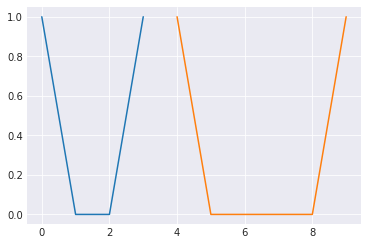

4     1.0
5     0.0
6     0.0
7     1.0
8     0.0
9     1.0
10    0.0
11    0.0
12    1.0
dtype: float64


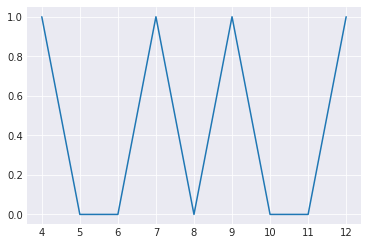

In [606]:
array_1 = pandas.Series(numpy.zeros(4), index=numpy.arange(0,4))
array_1[0] = 1
array_1[3] = 1
array_2 = pandas.Series(numpy.zeros(6), index=numpy.arange(4,10))
array_2.loc[4] = 1
array_2.loc[9] = 1
array_r = scipy.convolve(array_1, array_2, mode='full')

plt.plot(array_1)
plt.plot(array_2)
plt.show()
array_r = pandas.Series(array_r, index=numpy.arange(4,13))
print(pandas.Series(array_r))

plt.plot(array_r)

## OK, for equal scale vectors everything works, even at edges. New vector range is sum of smallest elements in input vectors to sum of largest elements in input vectors

## Test different scales

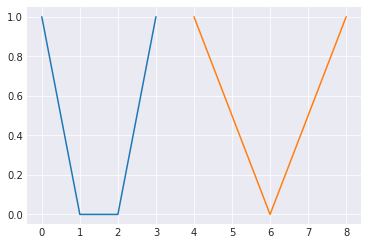

0    1.0
1    0.0
2    0.0
3    1.0
dtype: float64
4    1.0
6    0.0
8    1.0
dtype: float64
4.0     1.0
5.5     0.0
7.0     1.0
8.5     1.0
10.0    0.0
11.5    1.0
dtype: float64


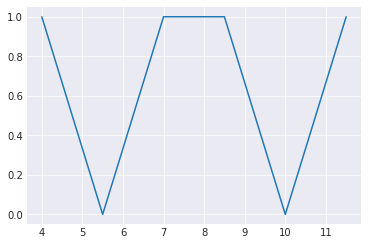

In [645]:
### First, do 2-element bins such that bins are [0,1], [2,3], etc. Index by bin starts
array_1 = pandas.Series(numpy.zeros(4), index=numpy.arange(0,4))
array_1[0] = 1
array_1[3] = 1
array_2 = pandas.Series(numpy.zeros(3), index=numpy.arange(4,10, step=2))
# Bins: [4,5], [6,7], [8,9]
# Elements: 4, 9
array_2.loc[4] = 1
array_2.loc[8] = 1
array_r = scipy.convolve(array_1, array_2, mode='full')

plt.plot(array_1)
plt.plot(array_2)
plt.show()
# array_r = pandas.Series(array_r)

min_val = 4
max_val = 12
array_r = pandas.Series(array_r, index=numpy.linspace(min_val, max_val+1, num=len(array_r)+1)[:-1])



print(array_1)
print(array_2)

print(array_r)

plt.plot(array_r)
# Want to see: 4, 7, 9, 12

In [650]:
x = numpy.array([4,7, 9, 12])
bins = numpy.linspace(min_val, max_val+1, num=len(array_r)+1)
numpy.histogram(x, bins=bins)

(array([1, 0, 1, 1, 0, 1]), array([ 4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. ]))

In [629]:
def add_histograms(frequencies_1, binstarts_1, frequencies_2, binstarts_2):

9.0

In [637]:
xi = 4
for i in range(7):
    print(i, xi + i * 1.33333333333333)

0 4.0
1 5.33333333333333
2 6.66666666666666
3 7.999999999999989
4 9.33333333333332
5 10.66666666666665
6 11.999999999999979


In [643]:
max_val = 13
min_val = 4
output_size = 6
increment = (max_val - min_val - 1) / output_size
print(increment)
index = numpy.linspace(min_val, max_val, num=output_size+1)[:-1]
print(index)

1.3333333333333333
[ 4.   5.5  7.   8.5 10.  11.5]


In [638]:
1.33333333333 * 6

7.99999999998

In [625]:
numpy.linspace(4,, num=6)

array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. ])

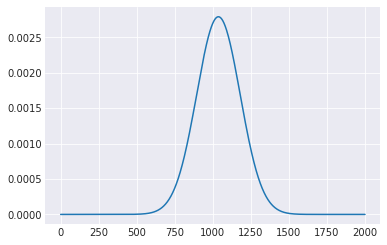

In [458]:
plt.plot(convolved_freqs)

In [459]:
X_span = X_distro.b - X_distro.a
Y_span = Y_distro.b - Y_distro.a

X_bin_size = X_span / 1001
Y_bin_size = Y_span / 1001
print(X_span, Y_span)
print(X_bin_size, Y_bin_size)

9.707978258484799 100.90856918851816
0.009698279978506292 0.10080776142709107


In [460]:
new_mean = X.mean() + Y.mean()
print(new_mean)

6.000319809255968


In [461]:
from numpy import sqrt
(sqrt(Y_span) + sqrt(X_span)) **2

173.2142533403324

In [462]:
result.mean()

6.000319809255968

1.8761246836886798 1.5968947174673715 3.4730194011560513

-46.21580906131135 53.95522683283627 100.17103589414762
-46 61 107


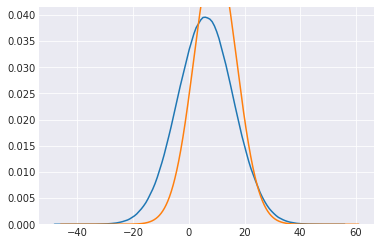

In [463]:
new_min = X_distro.a + Y_distro.a + X_bin_size + Y_bin_size
new_max = X_distro.b + Y_distro.b - X_bin_size - Y_bin_size

X_center = X_distro.a + X_span / 2
Y_center = Y_distro.a + Y_span / 2
new_center = X_center + Y_center
print(X_center, Y_center, new_center)

new_min = -46
new_max = 61



new_bins = numpy.linspace(new_min, new_max, num=2001)
new_bin_size = (new_max - new_min) / 2001

seaborn.kdeplot(result)
# plt.show()
plt.plot(new_bins, convolved_freqs / new_bin_size)

result_span = result.max() - result.min()
new_span = new_max - new_min
# print(X.min(), X.max())
# print(X_distro.a, X_distro.b)
# print(Y.min(), Y.max())
# print(Y_distro.a, Y_distro.b)
print()
print(result.min(), result.max(), result_span)
print(new_min, new_max, new_span)

### Subtraction

In [ ]:
seaborn.kdeplot(X)
seaborn.kdeplot(Y)
plt.show()

result = X - Y
seaborn.kdeplot(result)
plt.show()
print(numpy.mean(result), numpy.var(result), numpy.std(result), span(result))

## Tests

CDF of 0.5: 0.6900000000000004
CDF of -500: 0.01


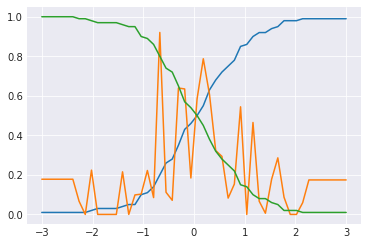

In [275]:
numpy.random.seed(1)
data = scipy.stats.norm.rvs(size=100)

test_distro_1 = EmpiricalDistribution.from_data(data)

xs = numpy.linspace(-3,3)
plt.plot(xs, test_distro_1.cdf(xs))
plt.plot(xs, test_distro_1.pdf(xs))
plt.plot(xs, test_distro_1.sf(xs))

print('CDF of 0.5: {}'.format(test_distro_1.cdf(0.5)))
print('CDF of -500: {}'.format(test_distro_1.cdf(-500)))

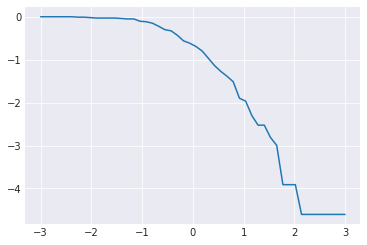

In [279]:
plt.plot(xs, test_distro_1.logsf(xs))

In [289]:
print('isf of -500: {}'.format(test_distro_1.isf(-500)))
print('isf of 500: {}'.format(test_distro_1.sf(500)))
print('isf of -500: {}'.format(test_distro_1.logsf(500)))

isf of -500: -6.661338147750939e-16
isf of 500: 0.01
isf of -500: -4.605170185988091


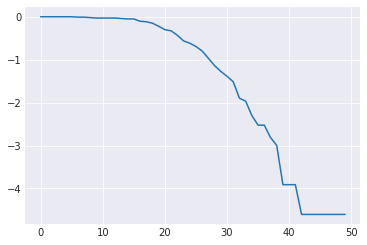

In [290]:
plt.plot(test_distro_1.logsf(xs))